In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Carregar o arquivo CSV
url = "https://raw.githubusercontent.com/icarocarmona/Tech-Challenges-DTAT-Grupo-26/main/F4-DATA-VIZ-PRODUCTION-MODELS/petroleo_bruto.csv"
df = pd.read_csv(url)

# Verificar as primeiras linhas do dataframe
print(df.head())

# Verificar informações sobre o dataframe
print(df.info())

# Estatísticas descritivas básicas
print(df.describe())

# Verificar se há valores nulos
print(df.isnull().sum())

# Renomear a coluna
df = df.rename(columns={'Preço - petróleo bruto - Brent (FOB)': 'Preço'})

print(df.head())

         Data  Preco
0  1987-05-20  18.63
1  1987-05-21  18.45
2  1987-05-22  18.55
3  1987-05-25  18.60
4  1987-05-26  18.63
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11164 entries, 0 to 11163
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    11164 non-null  object 
 1   Preco   11164 non-null  float64
dtypes: float64(1), object(1)
memory usage: 174.6+ KB
None
              Preco
count  11164.000000
mean      53.009718
std       33.229403
min        9.100000
25%       20.480000
50%       48.210000
75%       76.302500
max      143.950000
Data     0
Preco    0
dtype: int64
         Data  Preco
0  1987-05-20  18.63
1  1987-05-21  18.45
2  1987-05-22  18.55
3  1987-05-25  18.60
4  1987-05-26  18.63


In [59]:
df.head()

,Data,Preco
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


<Axes: title={'center': 'Variações Anuais do Preço do Petróleo Brent'}, xlabel='Ano'>

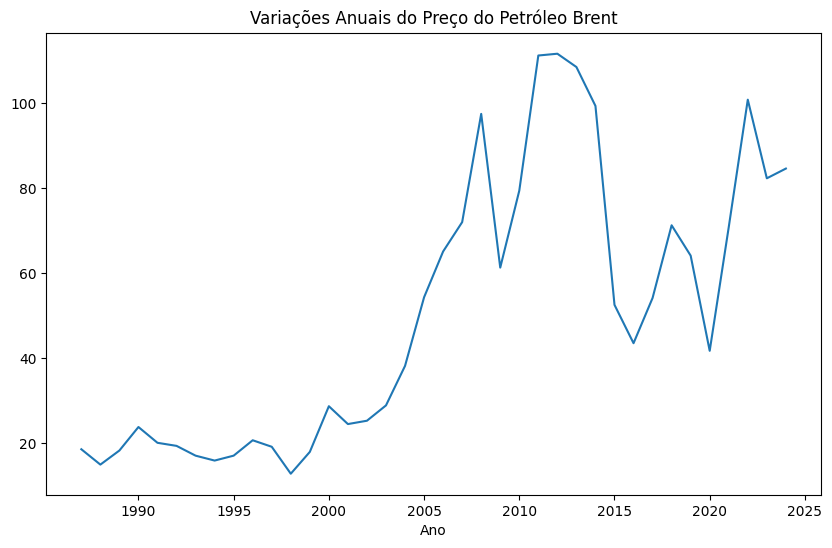

In [60]:
# Convertendo a coluna 'Data' para o tipo datetime
df['Data'] = pd.to_datetime(df['Data'])

# Extraindo o ano da coluna 'Data'
df['Ano'] = df['Data'].dt.year

# Agrupando os dados por ano e calculando a média dos preços
preco_anual = df.groupby('Ano')['Preco'].mean()

# Criando um gráfico de linha das variações anuais
preco_anual.plot(kind='line', figsize=(10, 6), title='Variações Anuais do Preço do Petróleo Brent')

In [61]:
# Agrupando os dados por ano e calculando a média dos preços (Gráfico Base da Pri)
preco_anual = df.groupby('Ano')['Preco'].mean()

# Criando o gráfico de linha
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=preco_anual.index,
    y=preco_anual.values,
    mode='lines+markers',
    name='Preço Médio Anual'
))

# Adicionando título e rótulos
fig.update_layout(
    title='Variações Anuais do Preço do Petróleo Brent',
    xaxis_title='Ano',
    yaxis_title='Preço Médio',
    xaxis=dict(tickmode='linear')
)

fig.show()


Correlação preço do petróleo com a taxa de câmbio: https://www.ibp.org.br/observatorio-do-setor/snapshots/preco-do-petroleo-e-taxa-de-cambio/

In [78]:
# Ano 2020

# Pegando ano de 2020
dados_2020 = df[df['Ano'] == 2020]

# Pegando meses da coluna de Data
dados_2020['Mes'] = dados_2020['Data'].dt.month

# Media mensal
media_mensal_2020 = dados_2020.groupby('Mes')['Preco'].mean()

dados_2020

,Data,Preco,Ano,Mês,Mes
10059,2020-01-02,67.05,2020,1,1
10060,2020-01-03,69.08,2020,1,1
10061,2020-01-06,70.25,2020,1,1
10062,2020-01-07,68.74,2020,1,1
10063,2020-01-08,67.31,2020,1,1
...,...,...,...,...,...
10311,2020-12-24,50.88,2020,12,12
10312,2020-12-28,50.88,2020,12,12
10313,2020-12-29,50.44,2020,12,12
10314,2020-12-30,50.74,2020,12,12


In [79]:
print(media_mensal_2020)

Mes
1     63.645455
2     55.702000
3     32.010000
4     18.466667
5     29.600000
6     40.266818
7     43.242174
8     44.736000
9     40.739600
10    40.189545
11    42.692381
12    49.845263
Name: Preco, dtype: float64


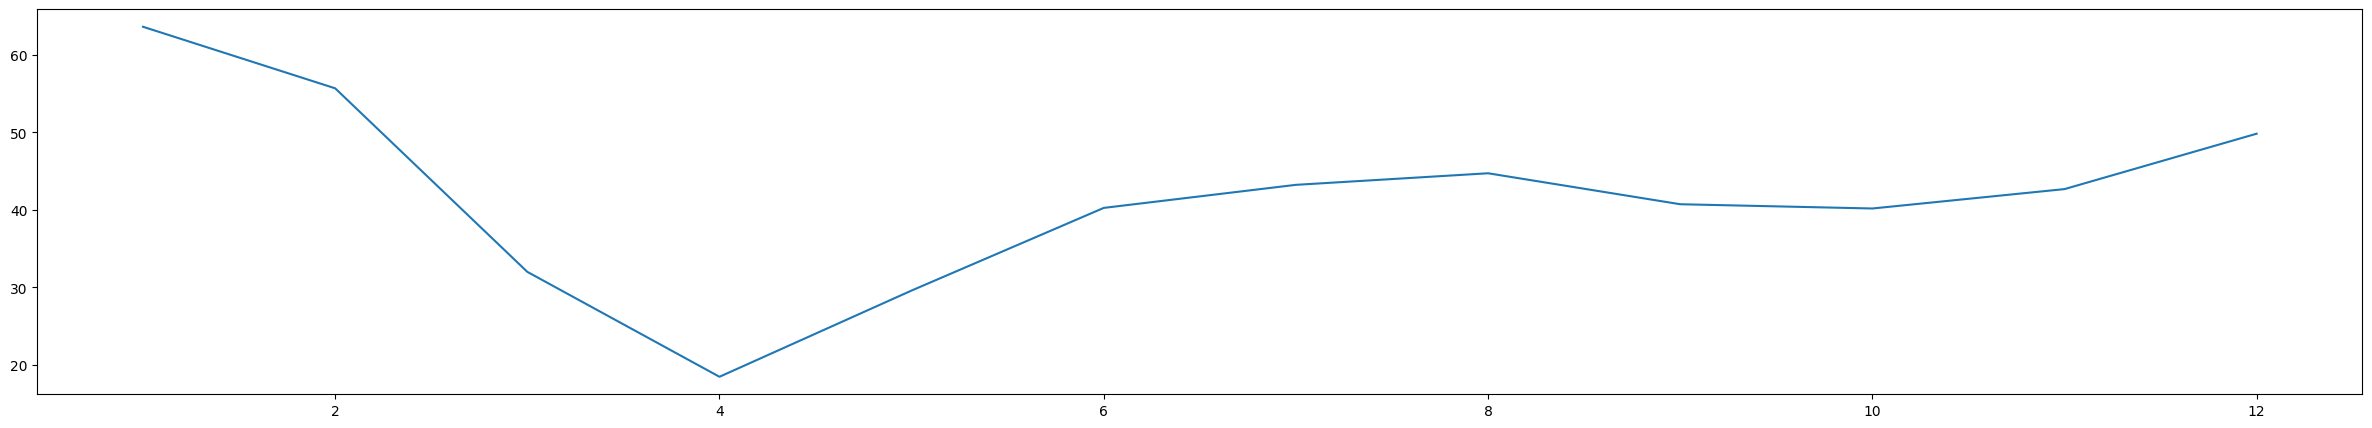

In [86]:
# Gráfico média mensal 2020

plt.figure(figsize = (30,5))
plt.plot(media_mensal_2020, label='Média Mensal 2020')

plt.show()

Mês de abril, primeiro indice negativo: https://g1.globo.com/economia/noticia/2020/04/20/preco-do-petroleo-americano-despenca-quase-40percent-e-vai-abaixo-de-us-12-o-barril.ghtml

Análise 2020: https://einvestidor.estadao.com.br/investimentos/preco-petroleo-2020/#:~:text=O%20temor%20relacionado%20%C3%A0%20prov%C3%A1vel,25%20para%20US%2468%2C60.

In [77]:
# Ano 2023

# Pegando ano de 2023
dados_2023 = df[df['Ano'] == 2023]

# Pegando meses da coluna de Data
dados_2023['Mes'] = dados_2023['Data'].dt.month

# Media mensal
media_mensal_2023 = dados_2023.groupby('Mes')['Preco'].mean()

dados_2023

,Data,Preco,Ano,Mês,Mes
10826,2023-01-02,82.82,2023,1,1
10827,2023-01-03,80.36,2023,1,1
10828,2023-01-04,75.31,2023,1,1
10829,2023-01-05,76.73,2023,1,1
10830,2023-01-06,76.41,2023,1,1
...,...,...,...,...,...
11072,2023-12-22,80.23,2023,12,12
11073,2023-12-26,80.23,2023,12,12
11074,2023-12-27,80.97,2023,12,12
11075,2023-12-28,79.04,2023,12,12


In [80]:
print(media_mensal_2023)

Mes
1     82.535000
2     82.585000
3     78.434348
4     84.739474
5     75.466000
6     74.839091
7     79.908696
8     86.147727
9     93.905000
10    90.775714
11    82.167895
12    77.761000
Name: Preco, dtype: float64


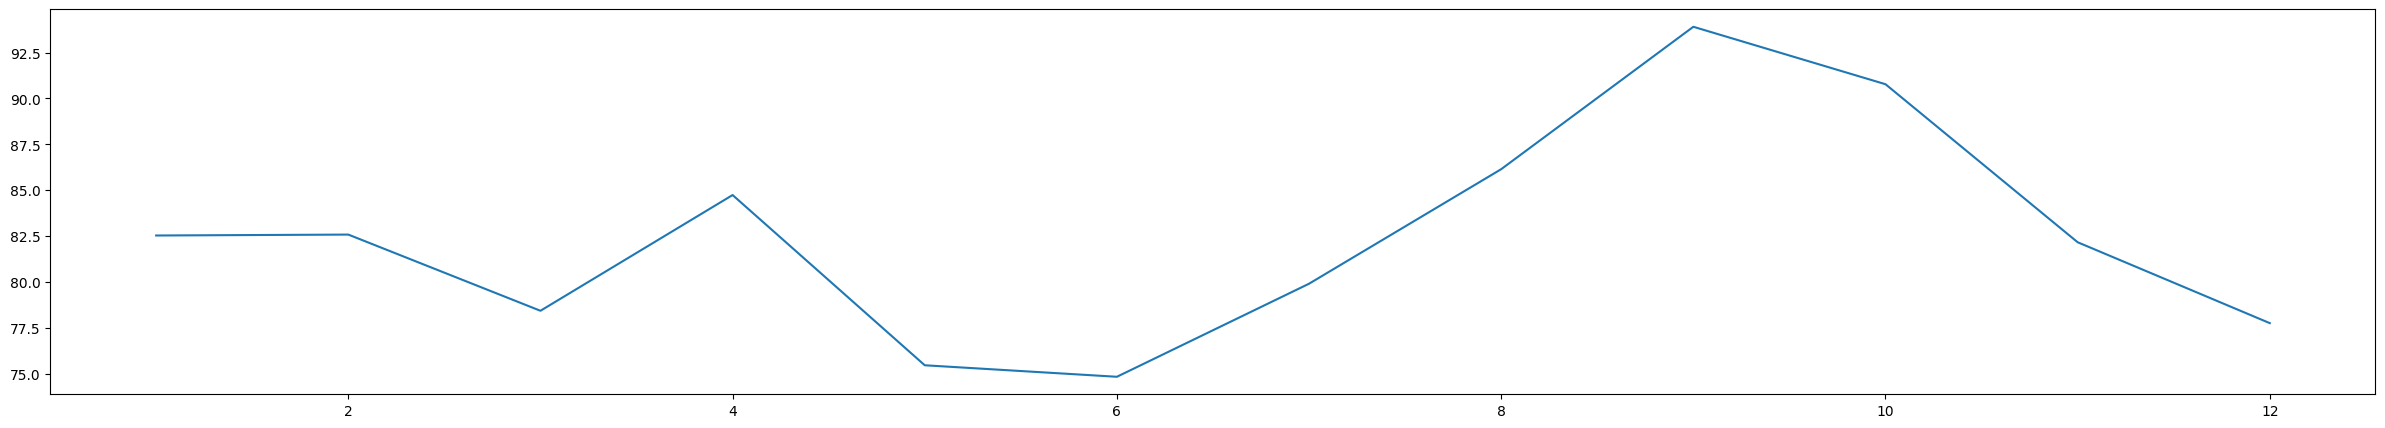

In [85]:
plt.figure(figsize = (30,5))
plt.plot(media_mensal_2023, label='Média Mensal 2023')

plt.show()

Geral GOV: https://www.gov.br/anp/pt-br/canais_atendimento/imprensa/noticias-comunicados/reservas-provadas-de-petroleo-no-brasil-crescem-7-em-2023#:~:text=Em%202023%2C%20houve%20aumento%20de,prov%C3%A1veis%20e%20poss%C3%ADveis%20(3P).

Highlights: https://agenciabrasil.ebc.com.br/economia/noticia/2024-02/producao-media-de-petroleo-e-gas-bate-recorde-em-2023-informa-anp